# DSML Group Project

import statements

In [1]:
import pandas as pd
import numpy as np
import re
import datetime as dt #for working with times objects

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1: Data Collection and Preparation

In [2]:
# You have been provided with a full dataset of bike sharing
# rentals. Select the cities you have been allocated and clean your dataset for use in later stages of your
# project. Briefly describe how you proceeded and how you dealt with possible missing/erroneous data.

In [3]:
# get data from la 2019


la_set = pd.read_csv("la_2019.csv", low_memory = False)



#converting start and end time into timestamps

la_set['start_time'] = pd.DatetimeIndex(la_set['start_time'])
la_set['end_time'] = pd.DatetimeIndex(la_set['end_time'])


In [4]:

#adding the exact_duration to the dataframe
la_set["exact_duration"] = la_set["end_time"]-la_set["start_time"]


In [5]:
la_set

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,exact_duration
0,2019-01-01 00:07:00,2019-01-01 00:14:00,3046,3051,6468,Walk-up,2nd & Hill,7th & Broadway,0 days 00:07:00
1,2019-01-01 00:08:00,2019-01-01 00:14:00,3046,3051,12311,Walk-up,2nd & Hill,7th & Broadway,0 days 00:06:00
2,2019-01-01 00:18:00,2019-01-01 00:50:00,3030,3075,5992,Walk-up,Main & 1st,Broadway & 9th,0 days 00:32:00
3,2019-01-01 00:20:00,2019-01-01 00:50:00,3030,3075,5860,Walk-up,Main & 1st,Broadway & 9th,0 days 00:30:00
4,2019-01-01 00:22:00,2019-01-01 00:50:00,3030,3075,6006,Walk-up,Main & 1st,Broadway & 9th,0 days 00:28:00
...,...,...,...,...,...,...,...,...,...
290337,2019-12-31 23:35:51,2020-01-02 17:13:50,4491,4491,5903,Monthly Pass,Main & Winston,Main & Winston,1 days 17:37:59
290338,2019-12-31 23:41:52,2019-12-31 23:50:58,4491,3022,18912,Monthly Pass,Main & Winston,3rd & Santa Fe,0 days 00:09:06
290339,2019-12-31 23:43:19,2019-12-31 23:47:41,3051,3064,12298,Annual Pass,7th & Broadway,Grand & 8th,0 days 00:04:22
290340,2019-12-31 23:48:17,2019-12-31 23:53:55,3064,3074,19053,Annual Pass,Grand & 8th,Hope & Olympic,0 days 00:05:38


In [6]:
# remove virtual station VS (ID 3000)
la_set_dropVS = la_set[(la_set["start_station_id"] != 3000) & (la_set["end_station_id"] != 3000)]
la_set_dropVS


,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,exact_duration
0,2019-01-01 00:07:00,2019-01-01 00:14:00,3046,3051,6468,Walk-up,2nd & Hill,7th & Broadway,0 days 00:07:00
1,2019-01-01 00:08:00,2019-01-01 00:14:00,3046,3051,12311,Walk-up,2nd & Hill,7th & Broadway,0 days 00:06:00
2,2019-01-01 00:18:00,2019-01-01 00:50:00,3030,3075,5992,Walk-up,Main & 1st,Broadway & 9th,0 days 00:32:00
3,2019-01-01 00:20:00,2019-01-01 00:50:00,3030,3075,5860,Walk-up,Main & 1st,Broadway & 9th,0 days 00:30:00
4,2019-01-01 00:22:00,2019-01-01 00:50:00,3030,3075,6006,Walk-up,Main & 1st,Broadway & 9th,0 days 00:28:00
...,...,...,...,...,...,...,...,...,...
290337,2019-12-31 23:35:51,2020-01-02 17:13:50,4491,4491,5903,Monthly Pass,Main & Winston,Main & Winston,1 days 17:37:59
290338,2019-12-31 23:41:52,2019-12-31 23:50:58,4491,3022,18912,Monthly Pass,Main & Winston,3rd & Santa Fe,0 days 00:09:06
290339,2019-12-31 23:43:19,2019-12-31 23:47:41,3051,3064,12298,Annual Pass,7th & Broadway,Grand & 8th,0 days 00:04:22
290340,2019-12-31 23:48:17,2019-12-31 23:53:55,3064,3074,19053,Annual Pass,Grand & 8th,Hope & Olympic,0 days 00:05:38


In [7]:
#how many lines were dropped
lines_dropped = len(la_set)-len(la_set_dropVS)
print("{} lines were dropped.".format(lines_dropped))

4664 lines were dropped.


In [8]:
# start end-stations "Metro Bike Share Free Bikes" ?? station 4285

# drop cells where station out of service OOS

la_set_dropOoS = la_set_dropVS[(la_set_dropVS["start_station_id"] != 4285)
                               & (la_set_dropVS["end_station_id"] != 4285)]
la_set_dropOoS


,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,exact_duration
0,2019-01-01 00:07:00,2019-01-01 00:14:00,3046,3051,6468,Walk-up,2nd & Hill,7th & Broadway,0 days 00:07:00
1,2019-01-01 00:08:00,2019-01-01 00:14:00,3046,3051,12311,Walk-up,2nd & Hill,7th & Broadway,0 days 00:06:00
2,2019-01-01 00:18:00,2019-01-01 00:50:00,3030,3075,5992,Walk-up,Main & 1st,Broadway & 9th,0 days 00:32:00
3,2019-01-01 00:20:00,2019-01-01 00:50:00,3030,3075,5860,Walk-up,Main & 1st,Broadway & 9th,0 days 00:30:00
4,2019-01-01 00:22:00,2019-01-01 00:50:00,3030,3075,6006,Walk-up,Main & 1st,Broadway & 9th,0 days 00:28:00
...,...,...,...,...,...,...,...,...,...
290337,2019-12-31 23:35:51,2020-01-02 17:13:50,4491,4491,5903,Monthly Pass,Main & Winston,Main & Winston,1 days 17:37:59
290338,2019-12-31 23:41:52,2019-12-31 23:50:58,4491,3022,18912,Monthly Pass,Main & Winston,3rd & Santa Fe,0 days 00:09:06
290339,2019-12-31 23:43:19,2019-12-31 23:47:41,3051,3064,12298,Annual Pass,7th & Broadway,Grand & 8th,0 days 00:04:22
290340,2019-12-31 23:48:17,2019-12-31 23:53:55,3064,3074,19053,Annual Pass,Grand & 8th,Hope & Olympic,0 days 00:05:38


In [9]:
#how many lines were dropped
lines_dropped = len(la_set_dropVS)-len(la_set_dropOoS)
print("{} lines were dropped.".format(lines_dropped))

6207 lines were dropped.


In [10]:
# Trips over 24 hours (long trips)

# drop cells where duration is over 24h


#more complex but unnessesary
la_set_dropLt = la_set_dropOoS[la_set_dropOoS["exact_duration"].apply(lambda x: x.total_seconds()) < (24*60*60)]

#[(la_set_dropOoS["exact_duration"].total_seconds())  > (24*60*60)]

la_set_dropLt

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,exact_duration
0,2019-01-01 00:07:00,2019-01-01 00:14:00,3046,3051,6468,Walk-up,2nd & Hill,7th & Broadway,0 days 00:07:00
1,2019-01-01 00:08:00,2019-01-01 00:14:00,3046,3051,12311,Walk-up,2nd & Hill,7th & Broadway,0 days 00:06:00
2,2019-01-01 00:18:00,2019-01-01 00:50:00,3030,3075,5992,Walk-up,Main & 1st,Broadway & 9th,0 days 00:32:00
3,2019-01-01 00:20:00,2019-01-01 00:50:00,3030,3075,5860,Walk-up,Main & 1st,Broadway & 9th,0 days 00:30:00
4,2019-01-01 00:22:00,2019-01-01 00:50:00,3030,3075,6006,Walk-up,Main & 1st,Broadway & 9th,0 days 00:28:00
...,...,...,...,...,...,...,...,...,...
290336,2019-12-31 23:34:46,2019-12-31 23:42:28,3063,3069,12019,Walk-up,Pershing Square,Broadway & 3rd,0 days 00:07:42
290338,2019-12-31 23:41:52,2019-12-31 23:50:58,4491,3022,18912,Monthly Pass,Main & Winston,3rd & Santa Fe,0 days 00:09:06
290339,2019-12-31 23:43:19,2019-12-31 23:47:41,3051,3064,12298,Annual Pass,7th & Broadway,Grand & 8th,0 days 00:04:22
290340,2019-12-31 23:48:17,2019-12-31 23:53:55,3064,3074,19053,Annual Pass,Grand & 8th,Hope & Olympic,0 days 00:05:38


In [11]:
#how many lines were dropped
lines_dropped = len(la_set_dropOoS)-len(la_set_dropLt)
print("{} lines were dropped.".format(lines_dropped))

449 lines were dropped.


In [12]:
# same start and  end-stations and duration 5min or below


# drop cells where are short round trips






la_set_dropSrt = la_set_dropLt[((la_set_dropLt["start_station_id"] == la_set_dropLt["end_station_id"])
                               & (la_set_dropLt["exact_duration"].apply(lambda x: x.total_seconds()) > (5*60)))
                               | (la_set_dropLt["start_station_id"] != la_set_dropLt["end_station_id"])]
la_set_dropSrt


,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,exact_duration
0,2019-01-01 00:07:00,2019-01-01 00:14:00,3046,3051,6468,Walk-up,2nd & Hill,7th & Broadway,0 days 00:07:00
1,2019-01-01 00:08:00,2019-01-01 00:14:00,3046,3051,12311,Walk-up,2nd & Hill,7th & Broadway,0 days 00:06:00
2,2019-01-01 00:18:00,2019-01-01 00:50:00,3030,3075,5992,Walk-up,Main & 1st,Broadway & 9th,0 days 00:32:00
3,2019-01-01 00:20:00,2019-01-01 00:50:00,3030,3075,5860,Walk-up,Main & 1st,Broadway & 9th,0 days 00:30:00
4,2019-01-01 00:22:00,2019-01-01 00:50:00,3030,3075,6006,Walk-up,Main & 1st,Broadway & 9th,0 days 00:28:00
...,...,...,...,...,...,...,...,...,...
290336,2019-12-31 23:34:46,2019-12-31 23:42:28,3063,3069,12019,Walk-up,Pershing Square,Broadway & 3rd,0 days 00:07:42
290338,2019-12-31 23:41:52,2019-12-31 23:50:58,4491,3022,18912,Monthly Pass,Main & Winston,3rd & Santa Fe,0 days 00:09:06
290339,2019-12-31 23:43:19,2019-12-31 23:47:41,3051,3064,12298,Annual Pass,7th & Broadway,Grand & 8th,0 days 00:04:22
290340,2019-12-31 23:48:17,2019-12-31 23:53:55,3064,3074,19053,Annual Pass,Grand & 8th,Hope & Olympic,0 days 00:05:38


In [13]:
#how many lines were dropped
lines_dropped = len(la_set_dropLt)-len(la_set_dropSrt)
print("{} lines were dropped.".format(lines_dropped))

8367 lines were dropped.


In [14]:
# trips under 1min

# drop cells where exact_duration is under 1min

la_set_dropOm = la_set_dropSrt[la_set_dropOoS["exact_duration"].apply(lambda x: x.total_seconds()) > 59]

#how many lines were dropped
lines_dropped = len(la_set_dropSrt)-len(la_set_dropOm)
print("{} lines were dropped.".format(lines_dropped))

20 lines were dropped.


<ipython-input-14-e5def1867b97>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  la_set_dropOm = la_set_dropSrt[la_set_dropOoS["exact_duration"].apply(lambda x: x.total_seconds()) > 59]


In [15]:
#rows with null values

# drop rows which have null values


la_set_dropNv = la_set_dropOm.dropna(axis=0, inplace=False)
la_set_dropNv

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,exact_duration
0,2019-01-01 00:07:00,2019-01-01 00:14:00,3046,3051,6468,Walk-up,2nd & Hill,7th & Broadway,0 days 00:07:00
1,2019-01-01 00:08:00,2019-01-01 00:14:00,3046,3051,12311,Walk-up,2nd & Hill,7th & Broadway,0 days 00:06:00
2,2019-01-01 00:18:00,2019-01-01 00:50:00,3030,3075,5992,Walk-up,Main & 1st,Broadway & 9th,0 days 00:32:00
3,2019-01-01 00:20:00,2019-01-01 00:50:00,3030,3075,5860,Walk-up,Main & 1st,Broadway & 9th,0 days 00:30:00
4,2019-01-01 00:22:00,2019-01-01 00:50:00,3030,3075,6006,Walk-up,Main & 1st,Broadway & 9th,0 days 00:28:00
...,...,...,...,...,...,...,...,...,...
290336,2019-12-31 23:34:46,2019-12-31 23:42:28,3063,3069,12019,Walk-up,Pershing Square,Broadway & 3rd,0 days 00:07:42
290338,2019-12-31 23:41:52,2019-12-31 23:50:58,4491,3022,18912,Monthly Pass,Main & Winston,3rd & Santa Fe,0 days 00:09:06
290339,2019-12-31 23:43:19,2019-12-31 23:47:41,3051,3064,12298,Annual Pass,7th & Broadway,Grand & 8th,0 days 00:04:22
290340,2019-12-31 23:48:17,2019-12-31 23:53:55,3064,3074,19053,Annual Pass,Grand & 8th,Hope & Olympic,0 days 00:05:38


In [74]:
#how many lines were dropped
lines_dropped = len(la_set_dropOm)-len(la_set_dropNv)
print("{} lines were dropped.".format(lines_dropped))

0 lines were dropped.


In [17]:
la_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290342 entries, 0 to 290341
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   start_time          290342 non-null  datetime64[ns] 
 1   end_time            290342 non-null  datetime64[ns] 
 2   start_station_id    290342 non-null  int64          
 3   end_station_id      290342 non-null  int64          
 4   bike_id             290342 non-null  object         
 5   user_type           290342 non-null  object         
 6   start_station_name  290342 non-null  object         
 7   end_station_name    290342 non-null  object         
 8   exact_duration      290342 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), int64(2), object(4), timedelta64[ns](1)
memory usage: 19.9+ MB


In [18]:
la_set_dropNv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270635 entries, 0 to 290341
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   start_time          270635 non-null  datetime64[ns] 
 1   end_time            270635 non-null  datetime64[ns] 
 2   start_station_id    270635 non-null  int64          
 3   end_station_id      270635 non-null  int64          
 4   bike_id             270635 non-null  object         
 5   user_type           270635 non-null  object         
 6   start_station_name  270635 non-null  object         
 7   end_station_name    270635 non-null  object         
 8   exact_duration      270635 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), int64(2), object(4), timedelta64[ns](1)
memory usage: 20.6+ MB


In [19]:
# assign la_set to dataset where Out Of Service and Virtual Station are removed
la_set = la_set_dropNv
#reset indices
la_set.reset_index(drop=True)
la_set

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,exact_duration
0,2019-01-01 00:07:00,2019-01-01 00:14:00,3046,3051,6468,Walk-up,2nd & Hill,7th & Broadway,0 days 00:07:00
1,2019-01-01 00:08:00,2019-01-01 00:14:00,3046,3051,12311,Walk-up,2nd & Hill,7th & Broadway,0 days 00:06:00
2,2019-01-01 00:18:00,2019-01-01 00:50:00,3030,3075,5992,Walk-up,Main & 1st,Broadway & 9th,0 days 00:32:00
3,2019-01-01 00:20:00,2019-01-01 00:50:00,3030,3075,5860,Walk-up,Main & 1st,Broadway & 9th,0 days 00:30:00
4,2019-01-01 00:22:00,2019-01-01 00:50:00,3030,3075,6006,Walk-up,Main & 1st,Broadway & 9th,0 days 00:28:00
...,...,...,...,...,...,...,...,...,...
290336,2019-12-31 23:34:46,2019-12-31 23:42:28,3063,3069,12019,Walk-up,Pershing Square,Broadway & 3rd,0 days 00:07:42
290338,2019-12-31 23:41:52,2019-12-31 23:50:58,4491,3022,18912,Monthly Pass,Main & Winston,3rd & Santa Fe,0 days 00:09:06
290339,2019-12-31 23:43:19,2019-12-31 23:47:41,3051,3064,12298,Annual Pass,7th & Broadway,Grand & 8th,0 days 00:04:22
290340,2019-12-31 23:48:17,2019-12-31 23:53:55,3064,3074,19053,Annual Pass,Grand & 8th,Hope & Olympic,0 days 00:05:38


In [20]:
# get data from metro bike share stations
# https://bikeshare.metro.net/about/data/
#file_path=r"\Users\Jan\DSML\SiliconValley-main (1)\SiliconValley-main"

stations_set = pd.read_csv("metro-bike-share-stations-2021-04-01.csv")

# delete rows with stations only being active after 2019? predict on region?

In [21]:
stations_set

,Station_ID,Station_Name,Day of Go_live_date,Region,Status
0,3000,Virtual Station,7/7/2016,NaN,Active
1,3005,7th & Flower,7/7/2016,DTLA,Active
2,3006,Olive & 8th,7/7/2016,DTLA,Active
3,3007,5th & Grand,7/7/2016,DTLA,Active
4,3008,Figueroa & 9th,7/7/2016,DTLA,Active
...,...,...,...,...,...
334,4577,Inglewood & Braddock,12/9/2020,Westside,Active
335,4580,Centinela & Lucile,11/27/2020,Westside,Active
336,4581,Playa Vista Library,2/2/2021,Westside,Active
337,4582,Westlawn & Beatrice,11/17/2020,Westside,Active


In [22]:
# Out of Service -> delete rows?
# 2019-02-28 13:35:00,2019-02-28 15:24:00,4344,4286,16004,Walk-up,Downtown Santa Monica Expo Line Station,Metro Bike Share Out of Service Area Smart Bike
# isnull/ data completely missing
# virtual station? Virtual Station" is used by staff to check in or check out a bike remotely for a special event 
# or in a situation in which a bike could not otherwise be checked in or out to a station

# any other outliers/ data that could be wrong or missing?

# Task 2: Descriptive Analytics

In [23]:
# Temporal Demand Patterns and Seasonality: 
# How does fleet usage varies during a day, a week and the year // split day in 24 hours? // weekdays/weekend// monthly differences/ summer/winter etc. //
# ideas: work times (daily), seasons, holiday,special events, weather at this point?

In [31]:

fleet_size = len(la_set["bike_id"].unique())
station_amount = len(la_set["start_station_id"].unique())

print("The la fleet consists of {} bikes".format(fleet_size), "and there are {} staion, which were used in 2019.".format(station_amount))

The la fleet consists of 2411 bikes and there are 230 staion, which were used in 2019.


In [32]:
# Geographical Demand Patterns:
# which stations are popular, which are not?
popular_start_stations = la_set["start_station_id"].value_counts()
print("popular start stations:\n", popular_start_stations.head(20), "\n")

popular_end_stations = la_set["end_station_id"].value_counts()
print("popular end stations:\n", popular_end_stations.head(20), "\n")

print("unpopular start stations:\n", popular_start_stations[-20:], "\n")

print("unpopular end stations:\n", popular_end_stations[-20:], "\n")
# -> count how many times station is mentioned (seperate start and stop?); maybe select routes that appear often

routes = la_set.groupby(['start_station_id', 'end_station_id']).size().sort_values(ascending=False)
print("popular routes: ")
routes.head(15)
# -> use api to visualize?

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html // how to join on station_id to print names next to it + region

popular start stations:
 3005    13627
3030    12891
3014    10634
3031     8503
3006     6527
3035     6075
3042     5879
4345     5793
3064     5481
3007     5008
3067     4967
3038     4840
3074     4703
3082     4631
3069     4417
3027     4350
3032     4072
4346     3986
3049     3909
3063     3882
Name: start_station_id, dtype: int64 

popular end stations:
 3005    14536
3014    11939
3030    11329
3031     9062
3006     6759
3042     6756
4345     6302
3035     6231
3064     5824
3082     5324
3032     4597
3067     4590
3074     4576
3069     4438
3038     4405
3007     4359
3063     4320
3034     3888
3075     3740
3027     3739
Name: end_station_id, dtype: int64 

unpopular start stations:
 4125    35
4462    30
4422    29
4493    29
4213    28
4482    27
4473    27
4457    26
4463    25
4461    23
4484    19
4469    16
4439    13
4395    11
4369     9
4108     7
4363     7
4374     4
4327     1
4490     1
Name: start_station_id, dtype: int64 

unpopular end stations:
 4473 

start_station_id  end_station_id
3030              3014              5135
3014              3030              4395
4345              4345              3313
4346              4346              1831
3030              3042              1395
3042              3030              1395
3014              3016              1302
4126              4126              1236
4346              4345              1129
4344              4344              1121
3005              3005              1097
3016              3014              1097
3031              3005              1045
3005              3031               994
3006              3006               791
dtype: int64

In [33]:
#amount of bike rentings gouped by date
day_demand = pd.DataFrame({'amount': la_set.groupby(la_set['start_time'].apply(lambda x: x.date())).size()})
#day_demand = pd.DataFrame(day_demand)

day_demand.reset_index(inplace=True)
day_demand = day_demand.rename(columns = {'start_time':'date'})
day_demand['weekday'] = day_demand['date'].apply(lambda x: x.weekday())

day_demand

,date,amount,weekday
0,2019-01-01,488,1
1,2019-01-02,654,2
2,2019-01-03,714,3
3,2019-01-04,777,4
4,2019-01-05,265,5
...,...,...,...
360,2019-12-27,690,4
361,2019-12-28,635,5
362,2019-12-29,525,6
363,2019-12-30,792,0


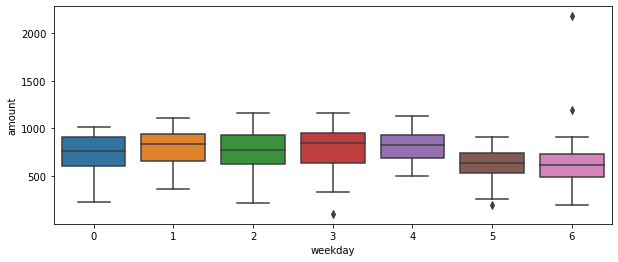

In [34]:
fig,ax = plt.subplots(figsize=(10,4)) 

sns.boxplot(x=day_demand['weekday'], y=day_demand["amount"],ax=ax)
plt.show()

In [35]:
#adding weekday to the la_set


#la_set["Weekday"] = la_set['start_time'].apply(lambda x: x.day_name())



#weekday = la_set['start_time'].apply(lambda x: x.day_name())
#weekday_demand = la_set['start_time'].apply(lambda x: x.day_name()).value_counts() 

#weekday_demand =  pd.DataFrame({'weekday': weekday, 'demand': demand})

#sns.boxplot(x=la_set['start_time'].apply(lambda x: x.day_name()), y =  ,data=la_set,palette="rainbow")
#plt.show()

In [46]:
# 4126, 4825, 4344, 4346, 4345 often occur as a pair of start and end station
# "Some short round trips or long trips may be the result of system or user error, but have been kept in the dataset for completeness" -> delete rows? keep them? delete if under 10 minutes? etc.

# Key Performance Indicators (3+):
# dashboard for fleet operators
# provide immediate overview of current operations
# and how well the fleet is doing in terms of utilization
# revenue, coverage and/or other business-related aspects
# explain KPIs: why? references
# calculate hourly values for the selectes KPIs + visualize
# Which trends? How to explain them

# Task 3: Predictive Analytics

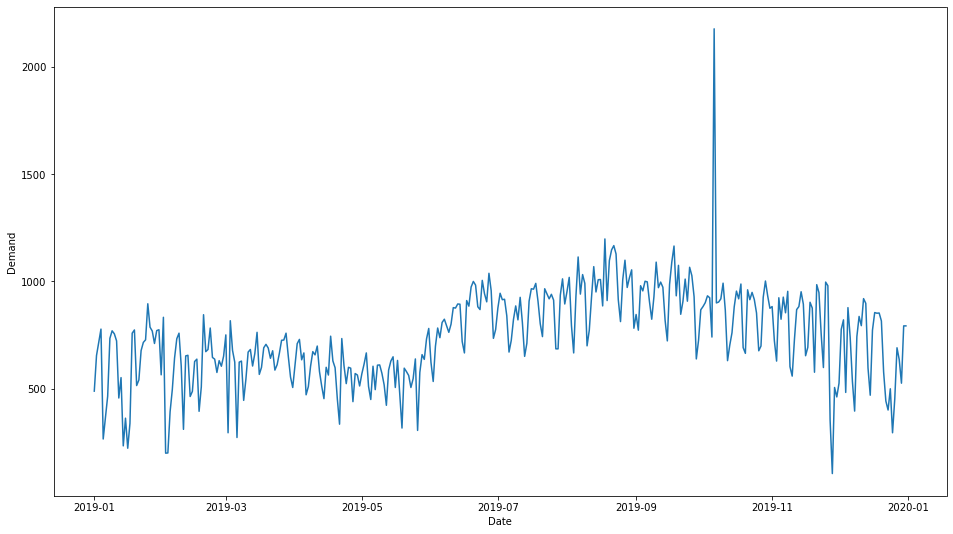

In [58]:
# import statements

from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(figsize = (16,9))

# Plotting the data
ax.plot(day_demand["date"],day_demand[["amount"]])
ax.set_xlabel("Date")
ax.set_ylabel("Demand")
plt.show()

In [57]:
#search for max demand 
day_demand.iloc[day_demand['amount'].argmax()]
# why so high?
# maybe https://www.ciclavia.org/ciclavia_heart_of_la19 : city closed for cars

date       2019-10-06
amount           2176
weekday             6
Name: 278, dtype: object

In [47]:
# forecasting total system-level demand in the next hour
# -> develop practical model that predicts rental demand
# as a function of suitable features available in or derived from the datasets (incl. the weather data)

Get weather data and keep 2019 data only:

In [80]:
# read csv file
weather_data = pd.read_csv("weather_hourly_la.csv", low_memory = False)

#only keep 2019
weather_data['year'] = pd.to_datetime(weather_data['date_time'])

weather_data = weather_data[weather_data['year'].dt.year == 2019]
weather_data.reset_index(drop = True)


,date_time,max_temp,min_temp,precip,year
0,2019-01-01 01:00:00,15.6,15.6,0.0,2019-01-01 01:00:00
1,2019-01-01 02:00:00,15.0,15.0,0.0,2019-01-01 02:00:00
2,2019-01-01 03:00:00,15.0,15.0,0.0,2019-01-01 03:00:00
3,2019-01-01 04:00:00,13.9,13.9,0.0,2019-01-01 04:00:00
4,2019-01-01 05:00:00,12.2,12.2,0.0,2019-01-01 05:00:00
...,...,...,...,...,...
8727,2019-12-31 19:00:00,20.0,20.0,0.0,2019-12-31 19:00:00
8728,2019-12-31 20:00:00,20.6,20.6,0.0,2019-12-31 20:00:00
8729,2019-12-31 21:00:00,21.1,21.1,0.0,2019-12-31 21:00:00
8730,2019-12-31 22:00:00,21.7,21.7,0.0,2019-12-31 22:00:00


In [48]:
# feature engineering: Develop a rich set of features that you expect to be correlated with your
# target. In this process you can draw on your domain knowledge and/or conduct additional research
# around the topic of demand prediction in vehicle rental networks. Justify your selection of features.

In [79]:
# possible features: weather -> temp; precip, time of the year, region of the city, time of the day, 

In [49]:
# Model Building: Select three regression algorithms that are suitable for the prediction task at
# hand. Explain and justify why you selected the three algorithms and describe their respective
# advantages and drawbacks.

In [29]:
# Model Evaluation: How well do the models perform? Evaluate and benchmark your models'
# performance using suitable evaluation metrics. Which model would you select for deployment?

In [30]:
# Outlook: How could the selected model be improved further? Explain some of the improvement
# levers that you might focus on in a follow-up project.